# **Trabalho Prático: Previsão de sucesso filmes**

## Descrição do Problema

* Se o filme fez mais dinheiro do que gastou, então considera-se que o filme teve sucesso.
* O objetivo deste projeto é prever se realmente fez mais dinheiro ou não a partir de outros atributos.

## Preparação do programa

### Bibliotecas e Funções

In [2]:

import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

#Modelo a usar
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

#Métricas de qualidade
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Leitura dos datasets

In [3]:
df = pd.read_csv('movies.csv')

## Exploração dos dados

Para esta etapa do trabalho, também se utilizou as informações obtidas no website "kaggle", tais como:
* Tipos dos atributos
* Conteúdo dos atributos
* Missing values

### Visualização dos dados

In [4]:
df.shape

(7668, 15)

In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


### Informações sobre os diferentes atributos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [8]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


### Missing Values

In [9]:
df.isna().any()

name        False
rating       True
genre       False
year        False
released     True
score        True
votes        True
director    False
writer       True
star         True
country      True
budget       True
gross        True
company      True
runtime      True
dtype: bool

In [10]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

### Matriz de Correlação

<AxesSubplot:>

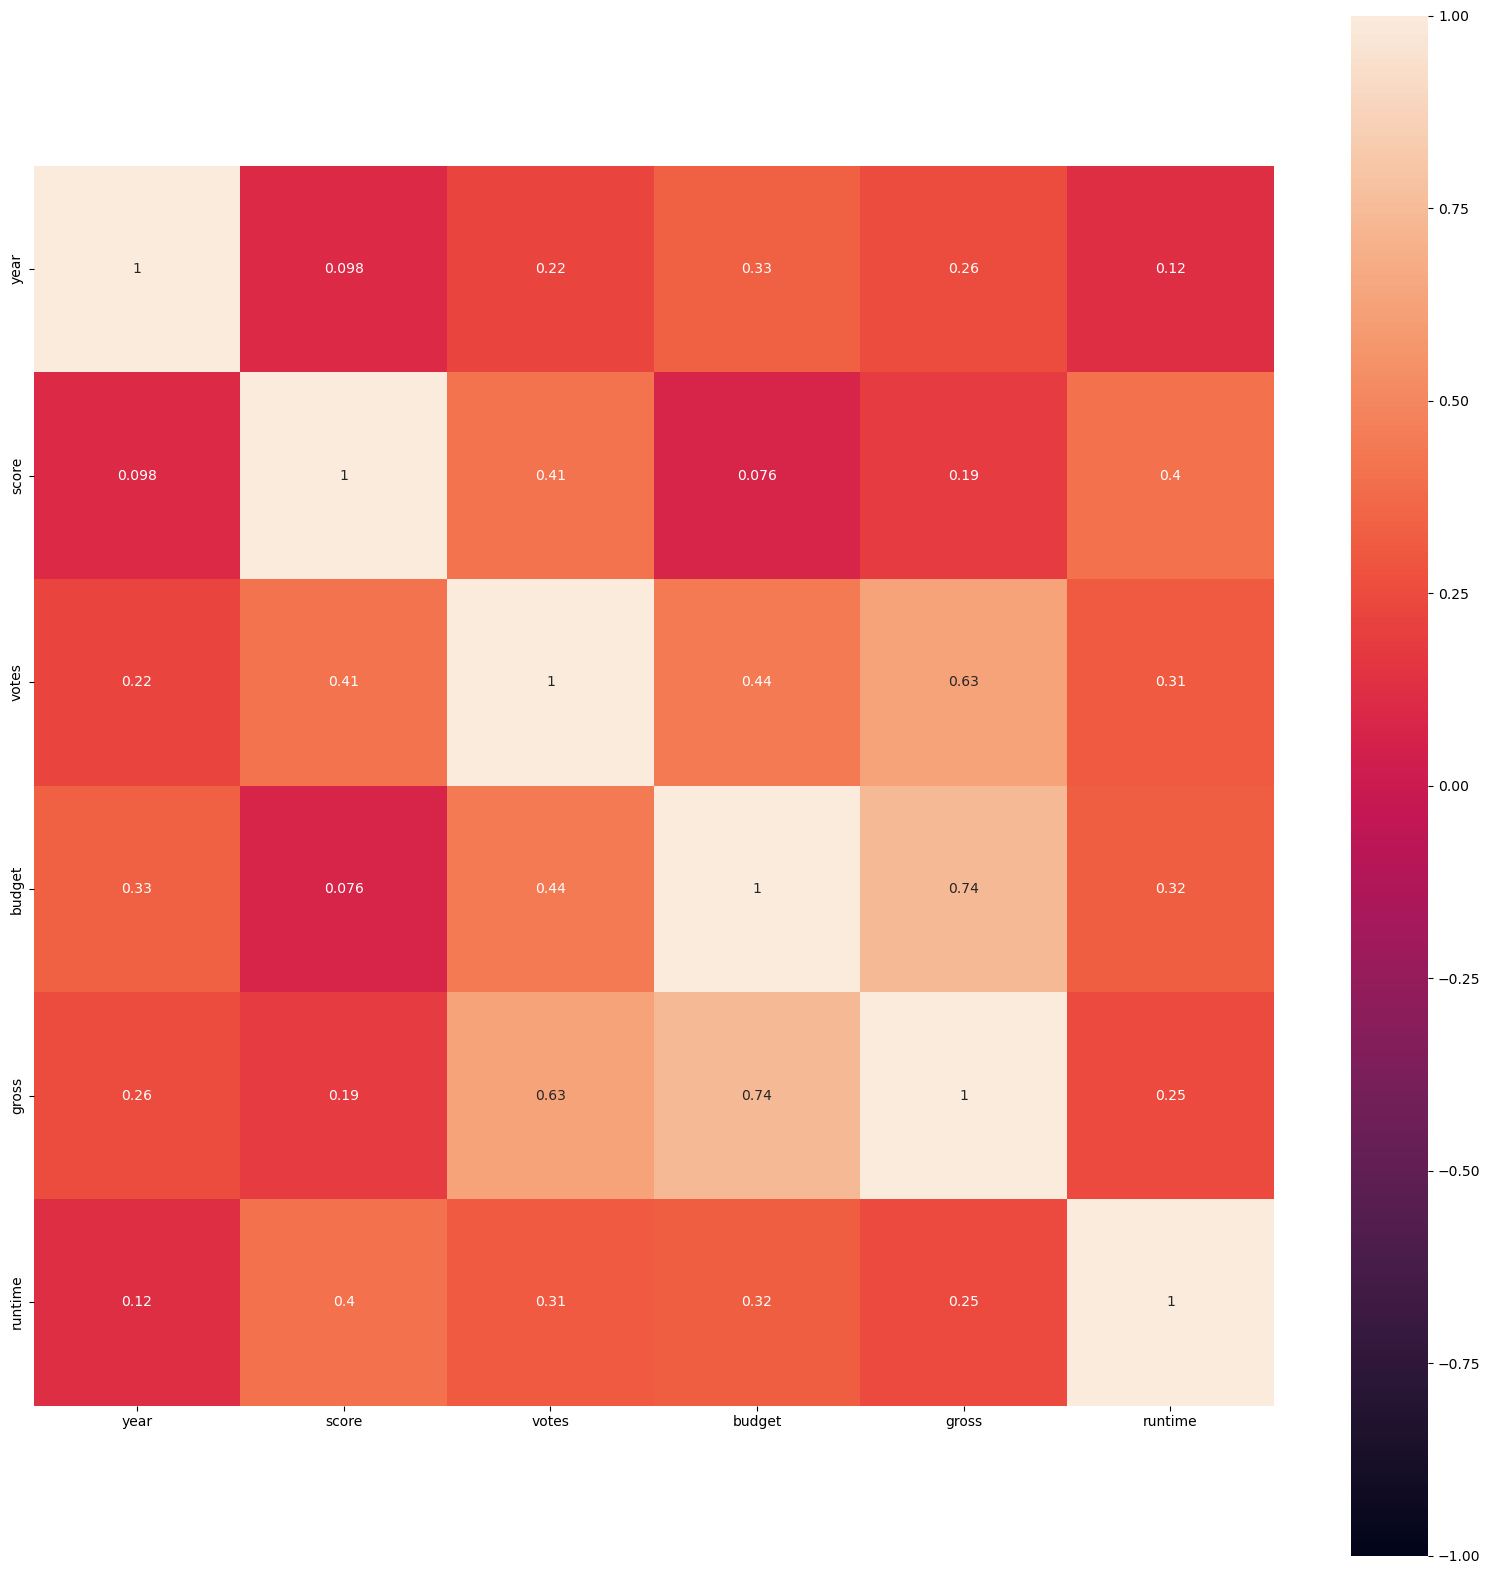

In [11]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

### Pairplot

### Histogramas

## Preparação dos dados

### Tratamento de valores em falta

In [12]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

### Apagar atributos

In [13]:
df.drop(['name'], axis=1, inplace=True)

#### String to Dates

Limpar datas que não correspondem 

In [14]:
i = 0
r = 0
for row in df['released']:
    row = str(row).split(' (')
    try:
        pd.to_datetime(datetime.strptime(row[0], '%B %d, %Y'))
    except ValueError:
        df.at[i, 'released'] = pd.NA
        r = r+1
        
    i = i+1

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

print("Dropped ", r, "rows")

df['released'] = df['released'].apply(lambda x: x.split(' ('))

df['released_date'] =  df['released'].apply(lambda x: x[0])
df['released_date'] = pd.to_datetime(df['released_date'] , format='%B %d, %Y')
df['released_country'] =  df['released'].apply(lambda x: x[1][:-1])

df['released_year']  = df['released_date'].dt.year
df['released_month'] = df['released_date'].dt.month
df['released_day']   = df['released_date'].dt.day
df['released_dayOfWeek']   = df['released_date'].dt.dayofweek

df = df.drop(["released"], axis=1)
df = df.drop(["released_date"], axis=1)

Dropped  14 rows


### Alteração do tipo dos atributos

#### Frequency Encoding

In [15]:
#frequency encoding

df['directorFrequency'] = df['director'].map(df['director'].value_counts())
df['writerFrequency'] = df['writer'].map(df['writer'].value_counts())
df['starFrequency'] = df['star'].map(df['star'].value_counts())
df['companyFrequency'] = df['company'].map(df['company'].value_counts())

#### Label Encoding

In [16]:

label_encoder = preprocessing.LabelEncoder()

#label encoding
df['director'] = label_encoder.fit_transform(df['director'])
df['writer'] = label_encoder.fit_transform(df['writer'])
df['star'] = label_encoder.fit_transform(df['star'])
df['company'] = label_encoder.fit_transform(df['company'])
df['country'] = label_encoder.fit_transform(df['country'])
df['genre'] = label_encoder.fit_transform(df['genre'])
df['rating'] = label_encoder.fit_transform(df['rating'])
df['released_country'] = label_encoder.fit_transform(df['released_country'])

df.head()

,rating,genre,year,score,votes,director,writer,star,country,budget,...,runtime,released_country,released_year,released_month,released_day,released_dayOfWeek,directorFrequency,writerFrequency,starFrequency,companyFrequency
0,6,6,1980,8.4,927000.0,1791,2828,694,46,19000000.0,...,146.0,47,1980,6,13,4,2,29,18,298
1,6,1,1980,5.8,65000.0,1574,1155,213,47,4500000.0,...,104.0,47,1980,7,2,2,4,2,4,302
2,4,0,1980,8.7,1200000.0,754,1815,1151,47,18000000.0,...,124.0,47,1980,6,20,4,3,1,2,10
3,4,4,1980,7.7,221000.0,885,1410,1467,47,3500000.0,...,88.0,47,1980,7,2,2,6,6,3,279
4,6,4,1980,7.3,108000.0,716,349,270,47,6000000.0,...,98.0,47,1980,7,25,4,9,2,16,46


#### Tipo do atributo dependente

## Modelos

### Preparação prévia

#### Separação da variável dependente

In [17]:
X_train = df.drop(['gross'], axis=1)
Y_train = df['gross'].to_frame()

#### Separação entre dataframe de teste e de treino

##### Modo de Treino

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

### Treino dos modelos

#### Decision Tree

#### Linear Regression

In [19]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

### Previsões

#### Decision Tree

#### Linear Regression

In [28]:
predictions = lm.predict(X_test)

## Métricas de Qualidade

### Decision Tree

#### Accuracy

#### Médias de métricas por peso

* __micro__: Calculate metrics globally by counting the total true positives, false negatives and false positives. 
* __macro__: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
* __weighted__: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

#### Métricas por Label

#### Cross Validation

Cross validation irá fazer vários segmentos e testá-los. Se houver um desvio padrão mt grande entre eles, isso quer dizer que existe over-fitting

### Linear Regression

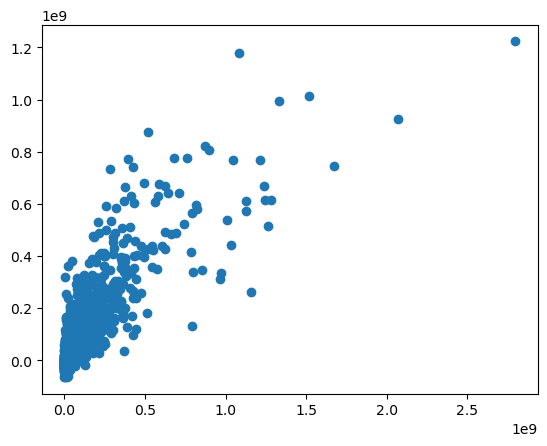

In [29]:
plt.scatter(Y_test, predictions)

c:\Users\vasco\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


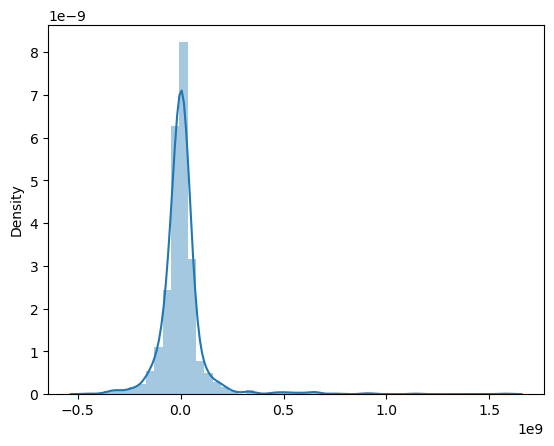

In [30]:
sns.distplot((Y_test-predictions), bins=50);

In [32]:
print('MAE:', mean_absolute_error(Y_test, predictions)) 
print('MSE:', mean_squared_error(Y_test, predictions)) 
print('RMSE:', np.sqrt(mean_squared_error(Y_test, predictions))) 
print('R2:', lm.score(X_test, Y_test)) #R2 score is the percentage of variance explained by the model

MAE: 59260763.544711694
MSE: 1.3609098608582784e+16
RMSE: 116658041.33698964
R2: 0.6700175637925714
